In [53]:
import  pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV

In [54]:
x,y = make_blobs()

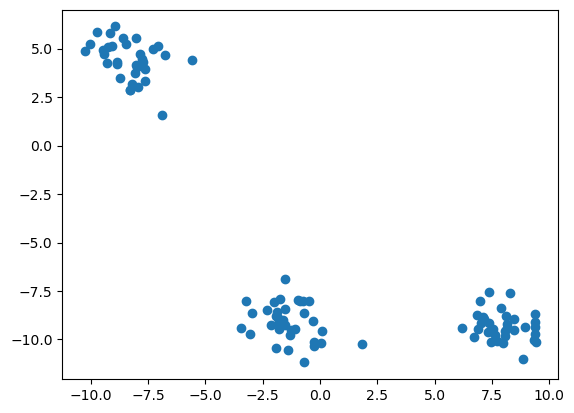

In [55]:
plt.scatter(x[:,0],x[:,1])

In [56]:
param = {
    'eps':[0.2,.4,.6,.8,1,1.9],
    'min_samples' : [1,2,3,6,7,10]
}


In [57]:
DBSCAN()

DBSCAN()

In [58]:
from sklearn.metrics import silhouette_score, make_scorer
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)

    # Remove noise points
    mask = labels != -1
    unique_labels = set(labels[mask])

    # Silhouette requires at least 2 clusters
    if len(unique_labels) < 2:
        return -1

    return silhouette_score(X[mask], labels[mask])

scorer = make_scorer(silhouette_scorer)

In [59]:
gr = GridSearchCV(DBSCAN(),param_grid=param,scoring=scorer,cv = [(slice(None),slice(None))])

In [60]:
gr.fit(x,y)

c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 370, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=DBSCAN(),
             param_grid={'eps': [0.2, 0.4, 0.6, 0.8, 1, 1.9],
                         'min_samples': [1, 2, 3, 6, 7, 10]},
             scoring=make_scorer(silhouette_scorer, response_method='predict'))

In [61]:
gr.best_params_

{'eps': 0.2, 'min_samples': 1}

In [ ]:
a=DBSCAN(1,min_samples=9).fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=a)

In [69]:
def dbscan_silhouette(estimator, X):
    labels = estimator.fit_predict(X)

    # Remove noise points
    mask = labels != -1
    unique_labels = set(labels[mask])

    # Silhouette requires at least 2 clusters
    if len(unique_labels) < 2:
        return -1

    return silhouette_score(X[mask], labels[mask])
scorer = make_scorer(dbscan_silhouette)

param_grid = {
    'eps': np.arange(0.2, 1.2, 0.2),
    'min_samples': [3, 5, 10]
}

dbscan = DBSCAN()

grid = GridSearchCV(
    estimator=dbscan,
    param_grid=param_grid,
    scoring=scorer,
    cv=[(slice(None), slice(None))],  # no CV split
    n_jobs=-1
)

grid.fit(x)


c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=DBSCAN(), n_jobs=-1,
             param_grid={'eps': array([0.2, 0.4, 0.6, 0.8, 1. ]),
                         'min_samples': [3, 5, 10]},
             scoring=make_scorer(dbscan_silhouette, response_method='predict'))

In [70]:
print("Best Parameters:", grid.best_params_)
print("Best Silhouette Score:", grid.best_score_)


Best Parameters: {'eps': 0.2, 'min_samples': 3}
Best Silhouette Score: nan


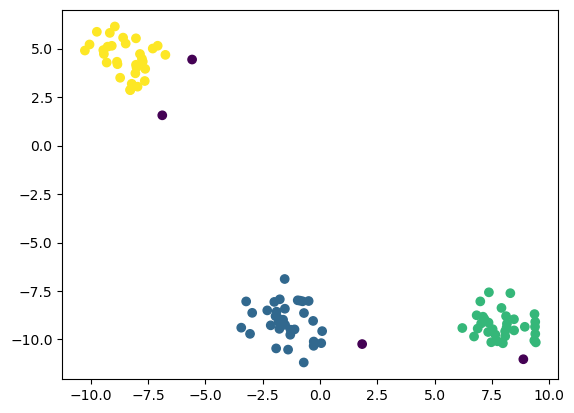

In [74]:
a=DBSCAN(1.2,min_samples=10).fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=a)